# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Load and Review Data

In [2]:
df = pd.read_csv('../data/pima-data.csv')

In [3]:
df.shape

(768, 10)

In [4]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [6]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [7]:
df.isnull().values.any()

False

In [8]:
df.select_dtypes(include='number')

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912
764,2,122,70,27,0,36.8,0.340,27,1.0638
765,5,121,72,23,112,26.2,0.245,30,0.9062
766,1,126,60,0,0,30.1,0.349,47,0.0000


In [9]:
def plot_corr(df):
    size = df.shape[1] + 1
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

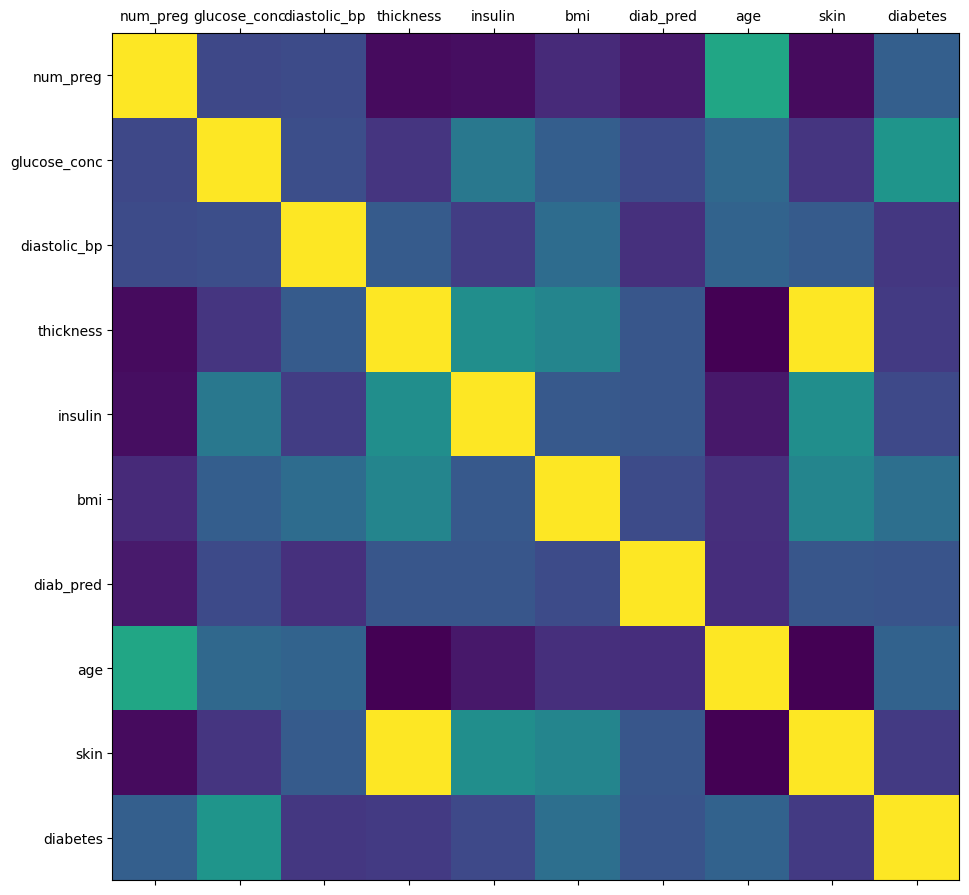

In [10]:
plot_corr(df)

In [11]:
del df['skin']
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


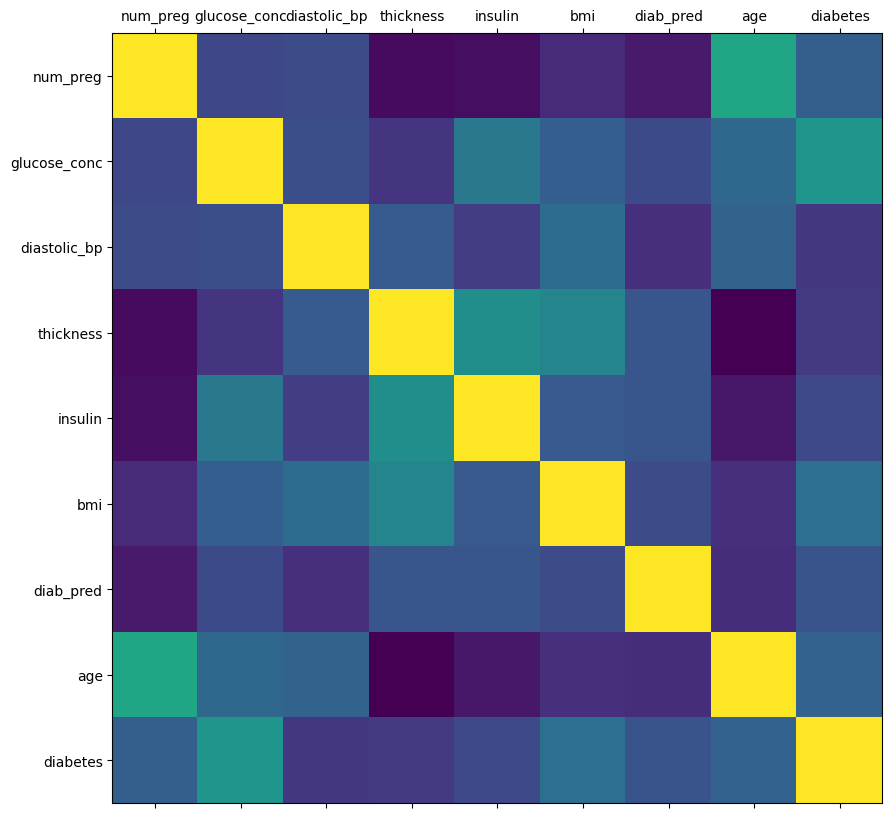

In [12]:
plot_corr(df)

## Check Data Types

In [13]:
boolean_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(boolean_map)

In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
num_true = len(df[df.loc[:,'diabetes'] == 1])
num_false = len(df[df.loc[:,'diabetes'] == 0])
print('number of true cases: {0} ({1:2.2f}%)'.format(num_true, num_true * 100.0 / (len(df))))
print('number of false cases: {0} ({1:2.2f}%)'.format(num_false, num_false * 100.0 / (len(df))))

number of true cases: 268 (34.90%)
number of false cases: 500 (65.10%)


## Splitting Data

In [16]:
from sklearn.model_selection import train_test_split

feature_names = df.columns[:-1].to_list()
predicted_class=df.columns[-1]

x = df[feature_names].values
y = df[predicted_class].values
split_test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

### Verify Predicted Value Was Split Correctly

In [17]:
print('Original true cases: {0} ({1:2.2f}%)'.format(num_true, num_true * 100.0 / (len(df))))
print('Original false cases: {0} ({1:2.2f}%)'.format(num_false, num_false * 100.0 / (len(df))))
print("")
print('Train true cases: {0} ({1:2.2f}%)'.format(len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 1]) * 100.0 / len(y_train)))
print('Train false cases: {0} ({1:2.2f}%)'.format(len(y_train[y_train[:] == 0]), len(y_train[y_train[:] == 0]) * 100.0 / (len(y_train))))
print("")
print('Test true cases: {0} ({1:2.2f}%)'.format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1]) * 100.0 / (len(y_test))))
print('Test false cases: {0} ({1:2.2f}%)'.format(len(y_test[y_test[:] == 0]), len(y_test[y_test[:] == 0]) * 100.0 / (len(y_test))))

Original true cases: 268 (34.90%)
Original false cases: 500 (65.10%)

Train true cases: 188 (35.01%)
Train false cases: 349 (64.99%)

Test true cases: 80 (34.63%)
Test false cases: 151 (65.37%)


### Post-Split Data Preparation

#### Hidden Missing Values

In [18]:
for x in df.columns[:-1]: print(f'{x} missing values: {len(df[df[x] == 0])}')

num_preg missing values: 111
glucose_conc missing values: 5
diastolic_bp missing values: 35
thickness missing values: 227
insulin missing values: 374
bmi missing values: 11
diab_pred missing values: 0
age missing values: 0


#### Impute Missing Data With Mean

In [19]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy='mean')
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## Training Initial Algorithm - Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB()

### Performance On Training Data

In [21]:
nb_predict_train = nb_model.predict(x_train)

from sklearn import metrics

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7542


### Performance On Testing Data

In [22]:
nb_predict_test = nb_model.predict(x_test)

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7359


#### Metrics

In [23]:
print('Confusion matrix')
cm = pd.DataFrame(
    metrics.confusion_matrix(y_test, nb_predict_test),
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative','Predicted Positive']
)
print(cm)
print('\nLegend')
legend = pd.DataFrame(
    [['TN', 'FP'], ['FN','TP']]
    ,
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative','Predicted Positive']
)
print(legend)
print('')
print('Classification report')
print(metrics.classification_report(y_test, nb_predict_test))
print('recall = TP / (TP + FN)')
print('precision = TP / (TP + FP)')

Confusion matrix
                 Predicted Negative  Predicted Positive
Actual Negative                 118                  33
Actual Positive                  28                  52

Legend
                Predicted Negative Predicted Positive
Actual Negative                 TN                 FP
Actual Positive                 FN                 TP

Classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231

recall = TP / (TP + FN)
precision = TP / (TP + FP)


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=42)

### Predict Training Data

In [25]:
rf_predict_train = rf_model.predict(x_train)
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


### Predict Test Data

In [26]:
rf_predict_test = rf_model.predict(x_test)
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7403


#### Metrics

In [27]:
print('Confusion matrix')
rf_cm = pd.DataFrame(
    metrics.confusion_matrix(y_test, rf_predict_test),
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative','Predicted Positive']
)
print(rf_cm)
print('\nLegend')
print(legend)
print('')
print('Classification report')
print(metrics.classification_report(y_test, rf_predict_test))
print('recall = TP / (TP + FN)')
print('precision = TP / (TP + FP)')

Confusion matrix
                 Predicted Negative  Predicted Positive
Actual Negative                 119                  32
Actual Positive                  28                  52

Legend
                Predicted Negative Predicted Positive
Actual Negative                 TN                 FP
Actual Positive                 FN                 TP

Classification report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

recall = TP / (TP + FN)
precision = TP / (TP + FP)


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, max_iter=1000)
lr_model.fit(x_train, y_train.ravel())

LogisticRegression(C=0.7, max_iter=1000, random_state=42)

### Predict Training Data

In [29]:
lr_predict_train = lr_model.predict(x_train)
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, lr_predict_train)))

Accuracy: 0.7877


### Predict Test Data

In [30]:
lr_predict_test = lr_model.predict(x_test)
print('Accuracy {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test)))

Accuracy 0.7359


#### Metrics

In [31]:
print('Confusion matrix')
lr_cm = pd.DataFrame(
    metrics.confusion_matrix(y_test, lr_predict_test),
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative','Predicted Positive']
)
print(lr_cm)
print('\nLegend')
print(legend)
print('')
print('Classification report')
print(metrics.classification_report(y_test, lr_predict_test))
print('recall = TP / (TP + FN)')
print('precision = TP / (TP + FP)')

Confusion matrix
                 Predicted Negative  Predicted Positive
Actual Negative                 123                  28
Actual Positive                  33                  47

Legend
                Predicted Negative Predicted Positive
Actual Negative                 TN                 FP
Actual Positive                 FN                 TP

Classification report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231

recall = TP / (TP + FN)
precision = TP / (TP + FP)


### Optimize Regularization Parameter

(0.4, 0.6625)


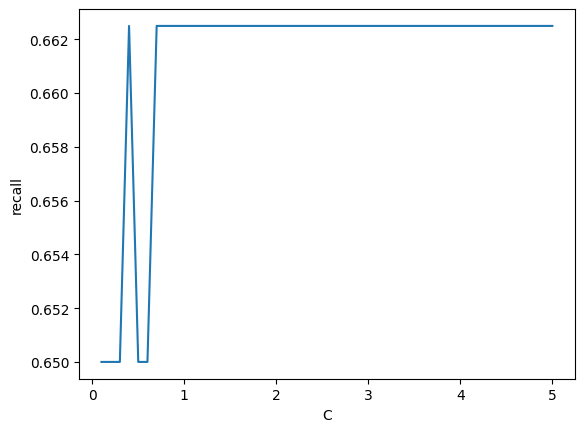

In [32]:
c_start = 0.1
c_end = 5
c_inc = 0.1

regularization_to_recall = []
c_val = c_start
while (c_val < c_end):
    lr_model_i = LogisticRegression(C=c_val, random_state=42, class_weight='balanced', max_iter=1000)
    lr_model_i.fit(x_train, y_train.ravel())
    lr_predict_test_i = lr_model_i.predict(x_test)
    recall_score_i = metrics.recall_score(y_test, lr_predict_test_i)
    regularization_to_recall.append((c_val, recall_score_i))
    c_val = c_val + c_inc

%matplotlib inline
plot_data = list(zip(*regularization_to_recall))
plt.plot(plot_data[0], plot_data[1], '-')
plt.xlabel('C')
plt.ylabel('recall')

max_regularization_to_recall = max(regularization_to_recall, key=lambda x: x[1])
print(max_regularization_to_recall)

In [33]:
lr_model_max = LogisticRegression(C=max_regularization_to_recall[1], class_weight='balanced', random_state=42, max_iter=1000)
lr_model_max.fit(x_train, y_train.ravel())
lr_predict_test_max = lr_model_max.predict(x_test)

print('Confusion matrix')
lr_cm = pd.DataFrame(
    metrics.confusion_matrix(y_test, lr_predict_test_max),
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative','Predicted Positive']
)
print(lr_cm)
print('\nLegend')
print(legend)
print('')
print('Classification report')
print(metrics.classification_report(y_test, lr_predict_test_max))
print('recall = TP / (TP + FN)')
print('precision = TP / (TP + FP)')

Confusion matrix
                 Predicted Negative  Predicted Positive
Actual Negative                 108                  43
Actual Positive                  27                  53

Legend
                Predicted Negative Predicted Positive
Actual Negative                 TN                 FP
Actual Positive                 FN                 TP

Classification report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.55      0.66      0.60        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.71      0.70      0.70       231

recall = TP / (TP + FN)
precision = TP / (TP + FP)


### LogisticRegressionCV

In [34]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight='balanced', max_iter=1000)
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=1000,
                     n_jobs=-1, random_state=42, refit=False)

### Predict On Test Data

In [35]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

print('Confusion matrix')
lr_cm = pd.DataFrame(
    metrics.confusion_matrix(y_test, lr_cv_predict_test),
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative','Predicted Positive']
)
print(lr_cm)
print('\nLegend')
print(legend)
print('')
print('Classification report')
print(metrics.classification_report(y_test, lr_cv_predict_test))
print('recall = TP / (TP + FN)')
print('precision = TP / (TP + FP)')

Confusion matrix
                 Predicted Negative  Predicted Positive
Actual Negative                 109                  42
Actual Positive                  27                  53

Legend
                Predicted Negative Predicted Positive
Actual Negative                 TN                 FP
Actual Positive                 FN                 TP

Classification report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231

recall = TP / (TP + FN)
precision = TP / (TP + FP)
